In [14]:
import tensorflow as tf
print(tf.__version__)
import keras

1.14.0


In [15]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

len(X_train), len(X_test) # 60,000 images in x_train, 10,000 images in x_test

(50000, 10000)

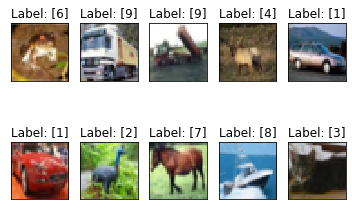

In [16]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.tight_layout
    plt.imshow(X_train[i], cmap='gray', interpolation='none') # converts array to image
    plt.title("Label: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [17]:
# Already has a channel dimension so it does not require reshaping

input_shape = (32, 32, 3)

# Normalization (Scale input features between 0.0 and 1.0)
# 255 is the maximum value of a byte
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255
print('X_train shape:', X_train.shape) # X_train shape: (50000, 32, 32, 3)
print('X_train[0] shape:', X_train[0].shape) # X_train shape: (50000, 32, 32, 3)
print(y_train.shape)

X_train shape: (50000, 32, 32, 3)
X_train[0] shape: (32, 32, 3)
(50000, 1)


In [18]:
from keras.utils import to_categorical

# Set number of categories
num_category = 10

# One-Hot Encode Data
y_train = to_categorical(y_train, num_category)
y_test = to_categorical(y_test, num_category)

print(X_train.shape[1:])
y_train.shape

(32, 32, 3)


(50000, 10)

In [19]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Softmax, Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_category))
model.add(Activation('softmax'))

In [20]:
# Use popualar and effective Adam Optimizer
# Categorical Cross Entropy as we have multiple classes
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
batch_size = 64
num_epoch = 15

# Train Model
model_log = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=num_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 104s 2ms/step - loss: 1.5469 - acc: 0.4317 - val_loss: 1.2896 - val_acc: 0.5373
Epoch 2/15
50000/50000 [==============================] - 101s 2ms/step - loss: 1.1288 - acc: 0.5974 - val_loss: 0.9612 - val_acc: 0.6586
Epoch 3/15
50000/50000 [==============================] - 103s 2ms/step - loss: 0.9515 - acc: 0.6674 - val_loss: 0.8165 - val_acc: 0.7131
Epoch 4/15
50000/50000 [==============================] - 103s 2ms/step - loss: 0.8506 - acc: 0.7040 - val_loss: 0.8235 - val_acc: 0.7096
Epoch 5/15
50000/50000 [==============================] - 102s 2ms/step - loss: 0.7716 - acc: 0.7293 - val_loss: 0.7068 - val_acc: 0.7563
Epoch 6/15
50000/50000 [==============================] - 102s 2ms/step - loss: 0.7200 - acc: 0.7462 - val_loss: 0.7114 - val_acc: 0.7532
Epoch 7/15
50000/50000 [==============================] - 101s 2ms/step - loss: 0.6826 - acc: 0.7616 - val_loss: 0.6768 - 

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0]) # FINAL TEST LOSS: 0.6511803083181381
print('Test Accuracy:', score[1]) # FINAL TEST ACCURACY: 0.7927

Test Loss: 0.6511803083181381
Test Accuracy: 0.7927


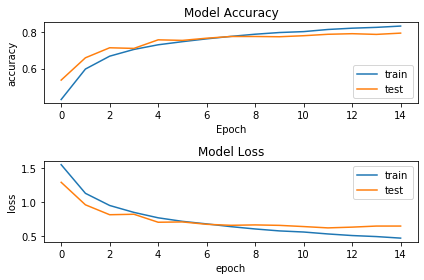

In [23]:
import os
# model accuracy plot
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

# model loss plot
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [24]:
# Save JSON config to disk
json_config = model.to_json()
with open("cifar.json", "w") as json_file:
    json_file.write(json_config)
    
# Save weights to disk
model.save_weights("cifar.h5")
print("Saved Model to Disk...")

Saved Model to Disk...
